In [41]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [42]:
env = gym.make("CartPole-v1")  # , render_mode = "human"

alpha = 0.1
dis_factor = 0.9
epsilon = 0.05
max_number_episodes = 500

discretization_segments = (7,7,7,7)

cart_vel_min = -1.25
cart_vel_max = 1.25
pole_ang_vel_min = -np.radians(45)
pole_ang_vel_max = np.radians(45)

state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds[1] = [cart_vel_min, cart_vel_max]
state_bounds[3] = [pole_ang_vel_min, pole_ang_vel_max]

In [51]:
class QLearning:
    def __init__(
        self,
        env,
        alpha,
        dis_factor,
        epsilon,
        max_episodes,
        discretization_segments,
        state_bounds,
    ):
        self.env = env
        self.alpha = alpha
        self.dis_factor = dis_factor
        self.epsilon = epsilon
        self.max_episodes = max_episodes
        self.discretization_segments = discretization_segments
        self.state_bounds = state_bounds
        self.action = self.env.action_space.n
        self.reward_sum_per_episode = []
        self.best_action_value_per_episode = []
        self.mean_reward = []
        self.q_table = np.random.uniform(
            low=0, high=1, size=(self.discretization_segments + (self.action,))
        )
        # If you want the initial q table to be zero, comment the line above this one 
        # and uncomment the line below
        # self.q_table = np.zeros(self.discretization_segments + (self.action,))
        
    def select_action(self, state):
        if (
            np.random.random() < self.epsilon
            or self.q_table[state][0] == self.q_table[state][1]
        ):
            action = self.env.action_space.sample()
        else:
            action = np.argmax(self.q_table[state])
        return action
    
    def discretize_state(self, state):
        state_indices = []
        for i in range(len(state)):
            if state[i] <= self.state_bounds[i][0]:
                indexed_state = 0
            elif state[i] >= self.state_bounds[i][1]:
                indexed_state = self.discretization_segments[i] - 1
            else:
                bound_width = self.state_bounds[i][1] - self.state_bounds[i][0]

                offset = (
                    (self.discretization_segments[i] - 1)
                    * self.state_bounds[i][0]
                    / bound_width
                )
                scaling = (self.discretization_segments[i] - 1) / bound_width

                indexed_state = int(round(scaling * state[i] - offset))

            state_indices.append(indexed_state)

        return tuple(state_indices)

    def train(self):
        total_reward = 0
        for episode in range(self.max_episodes):
            episode_rewards = 0
            epsiode_action_values = []
            (state, _) = self.env.reset()
            indexed_state = self.discretize_state(state)
            terminal_state = False
            
            print("\nEpisode = %d" % episode)
            
            for t in range(750):
                self.env.render()
                action = self.select_action(indexed_state)

                (next_state, reward, terminal_state, truncated, _) = self.env.step(action)
                episode_rewards += reward
                total_reward += reward
                next_indexed_state = self.discretize_state(next_state)

                next_best_action = np.amax(self.q_table[next_indexed_state])

                epsiode_action_values.append(self.q_table[next_indexed_state])

                td_target = reward + (self.dis_factor * next_best_action)

                td_error = td_target - self.q_table[indexed_state + (action,)]
                
                self.q_table[indexed_state + (action,)] = self.q_table[
                indexed_state + (action,)
                ] + self.alpha * (td_error)

                indexed_state = next_indexed_state

                if terminal_state or truncated:
                    self.reward_sum_per_episode.append(episode_rewards)
                    self.best_action_value_per_episode.append(
                        np.max(epsiode_action_values)
                    )
                    print("Episode %d finished after %f time steps" % (episode, t))
                    print("Reward: %f" % episode_rewards)
                    break
            if episode == 0:
                self.mean_reward.append(total_reward)
            else:
                self.mean_reward.append(total_reward / episode)
        print("Average Reward: {}".format(total_reward / episode))
        self.env.close()
        
    def simulate(self,simulation_iterations):
        env2 = gym.make("CartPole-v1") #, render_mode = "human"
        total_reward = 0
        mean = []
        for episode in range(simulation_iterations):
            (state, _) = env2.reset()
            indexed_state = self.discretize_state(state)
            terminal_state = False
            for t in range(500):
                env2.render()
                action = self.select_action(indexed_state)

                (next_state, reward, terminal_state, truncated, _) = env2.step(action)
                total_reward += reward
                
                next_indexed_state = self.discretize_state(next_state)

                next_best_action = np.amax(self.q_table[next_indexed_state])

                indexed_state = next_indexed_state

                if terminal_state or truncated:
                    break
            if episode == 0:
                mean.append(total_reward)
            else:
                mean.append(total_reward / episode)
        print("Average Reward: {}".format(total_reward / (episode+1)))            
        env2.close()
        return mean

In [44]:
Q = QLearning(
     env,
        alpha,
        dis_factor,
        epsilon,
        max_number_episodes,
        discretization_segments,
        state_bounds
    )
Q.train()


Episode = 0
Episode 0 finished after 38.000000 time steps
Reward: 39.000000

Episode = 1
Episode 1 finished after 37.000000 time steps
Reward: 38.000000

Episode = 2
Episode 2 finished after 17.000000 time steps
Reward: 18.000000

Episode = 3
Episode 3 finished after 15.000000 time steps
Reward: 16.000000

Episode = 4
Episode 4 finished after 30.000000 time steps
Reward: 31.000000

Episode = 5
Episode 5 finished after 33.000000 time steps
Reward: 34.000000

Episode = 6
Episode 6 finished after 79.000000 time steps
Reward: 80.000000

Episode = 7
Episode 7 finished after 123.000000 time steps
Reward: 124.000000

Episode = 8
Episode 8 finished after 77.000000 time steps
Reward: 78.000000

Episode = 9
Episode 9 finished after 13.000000 time steps
Reward: 14.000000

Episode = 10
Episode 10 finished after 31.000000 time steps
Reward: 32.000000

Episode = 11
Episode 11 finished after 78.000000 time steps
Reward: 79.000000

Episode = 12
Episode 12 finished after 68.000000 time steps
Reward: 6

Episode 106 finished after 40.000000 time steps
Reward: 41.000000

Episode = 107
Episode 107 finished after 22.000000 time steps
Reward: 23.000000

Episode = 108
Episode 108 finished after 40.000000 time steps
Reward: 41.000000

Episode = 109
Episode 109 finished after 70.000000 time steps
Reward: 71.000000

Episode = 110
Episode 110 finished after 12.000000 time steps
Reward: 13.000000

Episode = 111
Episode 111 finished after 19.000000 time steps
Reward: 20.000000

Episode = 112
Episode 112 finished after 75.000000 time steps
Reward: 76.000000

Episode = 113
Episode 113 finished after 57.000000 time steps
Reward: 58.000000

Episode = 114
Episode 114 finished after 67.000000 time steps
Reward: 68.000000

Episode = 115
Episode 115 finished after 50.000000 time steps
Reward: 51.000000

Episode = 116
Episode 116 finished after 39.000000 time steps
Reward: 40.000000

Episode = 117
Episode 117 finished after 16.000000 time steps
Reward: 17.000000

Episode = 118
Episode 118 finished after 4

Episode 209 finished after 52.000000 time steps
Reward: 53.000000

Episode = 210
Episode 210 finished after 76.000000 time steps
Reward: 77.000000

Episode = 211
Episode 211 finished after 59.000000 time steps
Reward: 60.000000

Episode = 212
Episode 212 finished after 13.000000 time steps
Reward: 14.000000

Episode = 213
Episode 213 finished after 60.000000 time steps
Reward: 61.000000

Episode = 214
Episode 214 finished after 44.000000 time steps
Reward: 45.000000

Episode = 215
Episode 215 finished after 42.000000 time steps
Reward: 43.000000

Episode = 216
Episode 216 finished after 32.000000 time steps
Reward: 33.000000

Episode = 217
Episode 217 finished after 66.000000 time steps
Reward: 67.000000

Episode = 218
Episode 218 finished after 76.000000 time steps
Reward: 77.000000

Episode = 219
Episode 219 finished after 24.000000 time steps
Reward: 25.000000

Episode = 220
Episode 220 finished after 35.000000 time steps
Reward: 36.000000

Episode = 221
Episode 221 finished after 2

Episode 310 finished after 103.000000 time steps
Reward: 104.000000

Episode = 311
Episode 311 finished after 242.000000 time steps
Reward: 243.000000

Episode = 312
Episode 312 finished after 144.000000 time steps
Reward: 145.000000

Episode = 313
Episode 313 finished after 50.000000 time steps
Reward: 51.000000

Episode = 314
Episode 314 finished after 129.000000 time steps
Reward: 130.000000

Episode = 315
Episode 315 finished after 48.000000 time steps
Reward: 49.000000

Episode = 316
Episode 316 finished after 57.000000 time steps
Reward: 58.000000

Episode = 317
Episode 317 finished after 19.000000 time steps
Reward: 20.000000

Episode = 318
Episode 318 finished after 85.000000 time steps
Reward: 86.000000

Episode = 319
Episode 319 finished after 114.000000 time steps
Reward: 115.000000

Episode = 320
Episode 320 finished after 48.000000 time steps
Reward: 49.000000

Episode = 321
Episode 321 finished after 135.000000 time steps
Reward: 136.000000

Episode = 322
Episode 322 fini

Episode 411 finished after 25.000000 time steps
Reward: 26.000000

Episode = 412
Episode 412 finished after 13.000000 time steps
Reward: 14.000000

Episode = 413
Episode 413 finished after 31.000000 time steps
Reward: 32.000000

Episode = 414
Episode 414 finished after 19.000000 time steps
Reward: 20.000000

Episode = 415
Episode 415 finished after 41.000000 time steps
Reward: 42.000000

Episode = 416
Episode 416 finished after 151.000000 time steps
Reward: 152.000000

Episode = 417
Episode 417 finished after 126.000000 time steps
Reward: 127.000000

Episode = 418
Episode 418 finished after 96.000000 time steps
Reward: 97.000000

Episode = 419
Episode 419 finished after 135.000000 time steps
Reward: 136.000000

Episode = 420
Episode 420 finished after 68.000000 time steps
Reward: 69.000000

Episode = 421
Episode 421 finished after 74.000000 time steps
Reward: 75.000000

Episode = 422
Episode 422 finished after 60.000000 time steps
Reward: 61.000000

Episode = 423
Episode 423 finished a

Episode 513 finished after 206.000000 time steps
Reward: 207.000000

Episode = 514
Episode 514 finished after 94.000000 time steps
Reward: 95.000000

Episode = 515
Episode 515 finished after 73.000000 time steps
Reward: 74.000000

Episode = 516
Episode 516 finished after 96.000000 time steps
Reward: 97.000000

Episode = 517
Episode 517 finished after 134.000000 time steps
Reward: 135.000000

Episode = 518
Episode 518 finished after 19.000000 time steps
Reward: 20.000000

Episode = 519
Episode 519 finished after 50.000000 time steps
Reward: 51.000000

Episode = 520
Episode 520 finished after 37.000000 time steps
Reward: 38.000000

Episode = 521
Episode 521 finished after 19.000000 time steps
Reward: 20.000000

Episode = 522
Episode 522 finished after 110.000000 time steps
Reward: 111.000000

Episode = 523
Episode 523 finished after 102.000000 time steps
Reward: 103.000000

Episode = 524
Episode 524 finished after 182.000000 time steps
Reward: 183.000000

Episode = 525
Episode 525 finish

Episode 617 finished after 84.000000 time steps
Reward: 85.000000

Episode = 618
Episode 618 finished after 85.000000 time steps
Reward: 86.000000

Episode = 619
Episode 619 finished after 11.000000 time steps
Reward: 12.000000

Episode = 620
Episode 620 finished after 27.000000 time steps
Reward: 28.000000

Episode = 621
Episode 621 finished after 93.000000 time steps
Reward: 94.000000

Episode = 622
Episode 622 finished after 26.000000 time steps
Reward: 27.000000

Episode = 623
Episode 623 finished after 37.000000 time steps
Reward: 38.000000

Episode = 624
Episode 624 finished after 210.000000 time steps
Reward: 211.000000

Episode = 625
Episode 625 finished after 167.000000 time steps
Reward: 168.000000

Episode = 626
Episode 626 finished after 75.000000 time steps
Reward: 76.000000

Episode = 627
Episode 627 finished after 68.000000 time steps
Reward: 69.000000

Episode = 628
Episode 628 finished after 266.000000 time steps
Reward: 267.000000

Episode = 629
Episode 629 finished a

Episode 717 finished after 178.000000 time steps
Reward: 179.000000

Episode = 718
Episode 718 finished after 113.000000 time steps
Reward: 114.000000

Episode = 719
Episode 719 finished after 29.000000 time steps
Reward: 30.000000

Episode = 720
Episode 720 finished after 111.000000 time steps
Reward: 112.000000

Episode = 721
Episode 721 finished after 200.000000 time steps
Reward: 201.000000

Episode = 722
Episode 722 finished after 150.000000 time steps
Reward: 151.000000

Episode = 723
Episode 723 finished after 70.000000 time steps
Reward: 71.000000

Episode = 724
Episode 724 finished after 60.000000 time steps
Reward: 61.000000

Episode = 725
Episode 725 finished after 245.000000 time steps
Reward: 246.000000

Episode = 726
Episode 726 finished after 154.000000 time steps
Reward: 155.000000

Episode = 727
Episode 727 finished after 124.000000 time steps
Reward: 125.000000

Episode = 728
Episode 728 finished after 93.000000 time steps
Reward: 94.000000

Episode = 729
Episode 729 

Episode 819 finished after 53.000000 time steps
Reward: 54.000000

Episode = 820
Episode 820 finished after 36.000000 time steps
Reward: 37.000000

Episode = 821
Episode 821 finished after 77.000000 time steps
Reward: 78.000000

Episode = 822
Episode 822 finished after 18.000000 time steps
Reward: 19.000000

Episode = 823
Episode 823 finished after 67.000000 time steps
Reward: 68.000000

Episode = 824
Episode 824 finished after 136.000000 time steps
Reward: 137.000000

Episode = 825
Episode 825 finished after 33.000000 time steps
Reward: 34.000000

Episode = 826
Episode 826 finished after 232.000000 time steps
Reward: 233.000000

Episode = 827
Episode 827 finished after 118.000000 time steps
Reward: 119.000000

Episode = 828
Episode 828 finished after 270.000000 time steps
Reward: 271.000000

Episode = 829
Episode 829 finished after 185.000000 time steps
Reward: 186.000000

Episode = 830
Episode 830 finished after 243.000000 time steps
Reward: 244.000000

Episode = 831
Episode 831 fini

Episode 919 finished after 323.000000 time steps
Reward: 324.000000

Episode = 920
Episode 920 finished after 129.000000 time steps
Reward: 130.000000

Episode = 921
Episode 921 finished after 9.000000 time steps
Reward: 10.000000

Episode = 922
Episode 922 finished after 161.000000 time steps
Reward: 162.000000

Episode = 923
Episode 923 finished after 103.000000 time steps
Reward: 104.000000

Episode = 924
Episode 924 finished after 197.000000 time steps
Reward: 198.000000

Episode = 925
Episode 925 finished after 34.000000 time steps
Reward: 35.000000

Episode = 926
Episode 926 finished after 208.000000 time steps
Reward: 209.000000

Episode = 927
Episode 927 finished after 82.000000 time steps
Reward: 83.000000

Episode = 928
Episode 928 finished after 222.000000 time steps
Reward: 223.000000

Episode = 929
Episode 929 finished after 115.000000 time steps
Reward: 116.000000

Episode = 930
Episode 930 finished after 192.000000 time steps
Reward: 193.000000

Episode = 931
Episode 931

Episode 1020 finished after 111.000000 time steps
Reward: 112.000000

Episode = 1021
Episode 1021 finished after 128.000000 time steps
Reward: 129.000000

Episode = 1022
Episode 1022 finished after 81.000000 time steps
Reward: 82.000000

Episode = 1023
Episode 1023 finished after 104.000000 time steps
Reward: 105.000000

Episode = 1024
Episode 1024 finished after 88.000000 time steps
Reward: 89.000000

Episode = 1025
Episode 1025 finished after 113.000000 time steps
Reward: 114.000000

Episode = 1026
Episode 1026 finished after 140.000000 time steps
Reward: 141.000000

Episode = 1027
Episode 1027 finished after 82.000000 time steps
Reward: 83.000000

Episode = 1028
Episode 1028 finished after 107.000000 time steps
Reward: 108.000000

Episode = 1029
Episode 1029 finished after 93.000000 time steps
Reward: 94.000000

Episode = 1030
Episode 1030 finished after 198.000000 time steps
Reward: 199.000000

Episode = 1031
Episode 1031 finished after 89.000000 time steps
Reward: 90.000000

Episo

Episode 1118 finished after 247.000000 time steps
Reward: 248.000000

Episode = 1119
Episode 1119 finished after 263.000000 time steps
Reward: 264.000000

Episode = 1120
Episode 1120 finished after 317.000000 time steps
Reward: 318.000000

Episode = 1121
Episode 1121 finished after 58.000000 time steps
Reward: 59.000000

Episode = 1122
Episode 1122 finished after 67.000000 time steps
Reward: 68.000000

Episode = 1123
Episode 1123 finished after 20.000000 time steps
Reward: 21.000000

Episode = 1124
Episode 1124 finished after 185.000000 time steps
Reward: 186.000000

Episode = 1125
Episode 1125 finished after 221.000000 time steps
Reward: 222.000000

Episode = 1126
Episode 1126 finished after 267.000000 time steps
Reward: 268.000000

Episode = 1127
Episode 1127 finished after 330.000000 time steps
Reward: 331.000000

Episode = 1128
Episode 1128 finished after 95.000000 time steps
Reward: 96.000000

Episode = 1129
Episode 1129 finished after 127.000000 time steps
Reward: 128.000000

Epi

Episode 1217 finished after 145.000000 time steps
Reward: 146.000000

Episode = 1218
Episode 1218 finished after 234.000000 time steps
Reward: 235.000000

Episode = 1219
Episode 1219 finished after 168.000000 time steps
Reward: 169.000000

Episode = 1220
Episode 1220 finished after 154.000000 time steps
Reward: 155.000000

Episode = 1221
Episode 1221 finished after 151.000000 time steps
Reward: 152.000000

Episode = 1222
Episode 1222 finished after 202.000000 time steps
Reward: 203.000000

Episode = 1223
Episode 1223 finished after 166.000000 time steps
Reward: 167.000000

Episode = 1224
Episode 1224 finished after 62.000000 time steps
Reward: 63.000000

Episode = 1225
Episode 1225 finished after 182.000000 time steps
Reward: 183.000000

Episode = 1226
Episode 1226 finished after 286.000000 time steps
Reward: 287.000000

Episode = 1227
Episode 1227 finished after 226.000000 time steps
Reward: 227.000000

Episode = 1228
Episode 1228 finished after 92.000000 time steps
Reward: 93.000000


Episode 1317 finished after 69.000000 time steps
Reward: 70.000000

Episode = 1318
Episode 1318 finished after 126.000000 time steps
Reward: 127.000000

Episode = 1319
Episode 1319 finished after 172.000000 time steps
Reward: 173.000000

Episode = 1320
Episode 1320 finished after 499.000000 time steps
Reward: 500.000000

Episode = 1321
Episode 1321 finished after 186.000000 time steps
Reward: 187.000000

Episode = 1322
Episode 1322 finished after 379.000000 time steps
Reward: 380.000000

Episode = 1323
Episode 1323 finished after 107.000000 time steps
Reward: 108.000000

Episode = 1324
Episode 1324 finished after 229.000000 time steps
Reward: 230.000000

Episode = 1325
Episode 1325 finished after 139.000000 time steps
Reward: 140.000000

Episode = 1326
Episode 1326 finished after 233.000000 time steps
Reward: 234.000000

Episode = 1327
Episode 1327 finished after 295.000000 time steps
Reward: 296.000000

Episode = 1328
Episode 1328 finished after 390.000000 time steps
Reward: 391.00000

Episode 1417 finished after 171.000000 time steps
Reward: 172.000000

Episode = 1418
Episode 1418 finished after 245.000000 time steps
Reward: 246.000000

Episode = 1419
Episode 1419 finished after 143.000000 time steps
Reward: 144.000000

Episode = 1420
Episode 1420 finished after 40.000000 time steps
Reward: 41.000000

Episode = 1421
Episode 1421 finished after 153.000000 time steps
Reward: 154.000000

Episode = 1422
Episode 1422 finished after 162.000000 time steps
Reward: 163.000000

Episode = 1423
Episode 1423 finished after 88.000000 time steps
Reward: 89.000000

Episode = 1424
Episode 1424 finished after 86.000000 time steps
Reward: 87.000000

Episode = 1425
Episode 1425 finished after 204.000000 time steps
Reward: 205.000000

Episode = 1426
Episode 1426 finished after 135.000000 time steps
Reward: 136.000000

Episode = 1427
Episode 1427 finished after 136.000000 time steps
Reward: 137.000000

Episode = 1428
Episode 1428 finished after 18.000000 time steps
Reward: 19.000000

Epi

Episode 1518 finished after 145.000000 time steps
Reward: 146.000000

Episode = 1519
Episode 1519 finished after 120.000000 time steps
Reward: 121.000000

Episode = 1520
Episode 1520 finished after 89.000000 time steps
Reward: 90.000000

Episode = 1521
Episode 1521 finished after 139.000000 time steps
Reward: 140.000000

Episode = 1522
Episode 1522 finished after 29.000000 time steps
Reward: 30.000000

Episode = 1523
Episode 1523 finished after 144.000000 time steps
Reward: 145.000000

Episode = 1524
Episode 1524 finished after 129.000000 time steps
Reward: 130.000000

Episode = 1525
Episode 1525 finished after 100.000000 time steps
Reward: 101.000000

Episode = 1526
Episode 1526 finished after 84.000000 time steps
Reward: 85.000000

Episode = 1527
Episode 1527 finished after 17.000000 time steps
Reward: 18.000000

Episode = 1528
Episode 1528 finished after 128.000000 time steps
Reward: 129.000000

Episode = 1529
Episode 1529 finished after 159.000000 time steps
Reward: 160.000000

Epi

Episode 1618 finished after 195.000000 time steps
Reward: 196.000000

Episode = 1619
Episode 1619 finished after 118.000000 time steps
Reward: 119.000000

Episode = 1620
Episode 1620 finished after 62.000000 time steps
Reward: 63.000000

Episode = 1621
Episode 1621 finished after 64.000000 time steps
Reward: 65.000000

Episode = 1622
Episode 1622 finished after 114.000000 time steps
Reward: 115.000000

Episode = 1623
Episode 1623 finished after 47.000000 time steps
Reward: 48.000000

Episode = 1624
Episode 1624 finished after 116.000000 time steps
Reward: 117.000000

Episode = 1625
Episode 1625 finished after 116.000000 time steps
Reward: 117.000000

Episode = 1626
Episode 1626 finished after 115.000000 time steps
Reward: 116.000000

Episode = 1627
Episode 1627 finished after 32.000000 time steps
Reward: 33.000000

Episode = 1628
Episode 1628 finished after 36.000000 time steps
Reward: 37.000000

Episode = 1629
Episode 1629 finished after 32.000000 time steps
Reward: 33.000000

Episode

Episode 1719 finished after 110.000000 time steps
Reward: 111.000000

Episode = 1720
Episode 1720 finished after 63.000000 time steps
Reward: 64.000000

Episode = 1721
Episode 1721 finished after 19.000000 time steps
Reward: 20.000000

Episode = 1722
Episode 1722 finished after 327.000000 time steps
Reward: 328.000000

Episode = 1723
Episode 1723 finished after 138.000000 time steps
Reward: 139.000000

Episode = 1724
Episode 1724 finished after 43.000000 time steps
Reward: 44.000000

Episode = 1725
Episode 1725 finished after 233.000000 time steps
Reward: 234.000000

Episode = 1726
Episode 1726 finished after 328.000000 time steps
Reward: 329.000000

Episode = 1727
Episode 1727 finished after 65.000000 time steps
Reward: 66.000000

Episode = 1728
Episode 1728 finished after 355.000000 time steps
Reward: 356.000000

Episode = 1729
Episode 1729 finished after 30.000000 time steps
Reward: 31.000000

Episode = 1730
Episode 1730 finished after 180.000000 time steps
Reward: 181.000000

Episo

Episode 1818 finished after 44.000000 time steps
Reward: 45.000000

Episode = 1819
Episode 1819 finished after 109.000000 time steps
Reward: 110.000000

Episode = 1820
Episode 1820 finished after 47.000000 time steps
Reward: 48.000000

Episode = 1821
Episode 1821 finished after 73.000000 time steps
Reward: 74.000000

Episode = 1822
Episode 1822 finished after 52.000000 time steps
Reward: 53.000000

Episode = 1823
Episode 1823 finished after 46.000000 time steps
Reward: 47.000000

Episode = 1824
Episode 1824 finished after 137.000000 time steps
Reward: 138.000000

Episode = 1825
Episode 1825 finished after 98.000000 time steps
Reward: 99.000000

Episode = 1826
Episode 1826 finished after 205.000000 time steps
Reward: 206.000000

Episode = 1827
Episode 1827 finished after 54.000000 time steps
Reward: 55.000000

Episode = 1828
Episode 1828 finished after 156.000000 time steps
Reward: 157.000000

Episode = 1829
Episode 1829 finished after 132.000000 time steps
Reward: 133.000000

Episode =

Episode 1918 finished after 145.000000 time steps
Reward: 146.000000

Episode = 1919
Episode 1919 finished after 83.000000 time steps
Reward: 84.000000

Episode = 1920
Episode 1920 finished after 40.000000 time steps
Reward: 41.000000

Episode = 1921
Episode 1921 finished after 175.000000 time steps
Reward: 176.000000

Episode = 1922
Episode 1922 finished after 163.000000 time steps
Reward: 164.000000

Episode = 1923
Episode 1923 finished after 117.000000 time steps
Reward: 118.000000

Episode = 1924
Episode 1924 finished after 116.000000 time steps
Reward: 117.000000

Episode = 1925
Episode 1925 finished after 131.000000 time steps
Reward: 132.000000

Episode = 1926
Episode 1926 finished after 209.000000 time steps
Reward: 210.000000

Episode = 1927
Episode 1927 finished after 64.000000 time steps
Reward: 65.000000

Episode = 1928
Episode 1928 finished after 28.000000 time steps
Reward: 29.000000

Episode = 1929
Episode 1929 finished after 25.000000 time steps
Reward: 26.000000

Episo

Episode 2017 finished after 202.000000 time steps
Reward: 203.000000

Episode = 2018
Episode 2018 finished after 486.000000 time steps
Reward: 487.000000

Episode = 2019
Episode 2019 finished after 65.000000 time steps
Reward: 66.000000

Episode = 2020
Episode 2020 finished after 199.000000 time steps
Reward: 200.000000

Episode = 2021
Episode 2021 finished after 260.000000 time steps
Reward: 261.000000

Episode = 2022
Episode 2022 finished after 350.000000 time steps
Reward: 351.000000

Episode = 2023
Episode 2023 finished after 16.000000 time steps
Reward: 17.000000

Episode = 2024
Episode 2024 finished after 76.000000 time steps
Reward: 77.000000

Episode = 2025
Episode 2025 finished after 147.000000 time steps
Reward: 148.000000

Episode = 2026
Episode 2026 finished after 94.000000 time steps
Reward: 95.000000

Episode = 2027
Episode 2027 finished after 272.000000 time steps
Reward: 273.000000

Episode = 2028
Episode 2028 finished after 98.000000 time steps
Reward: 99.000000

Episo

Episode 2115 finished after 150.000000 time steps
Reward: 151.000000

Episode = 2116
Episode 2116 finished after 39.000000 time steps
Reward: 40.000000

Episode = 2117
Episode 2117 finished after 107.000000 time steps
Reward: 108.000000

Episode = 2118
Episode 2118 finished after 223.000000 time steps
Reward: 224.000000

Episode = 2119
Episode 2119 finished after 15.000000 time steps
Reward: 16.000000

Episode = 2120
Episode 2120 finished after 211.000000 time steps
Reward: 212.000000

Episode = 2121
Episode 2121 finished after 41.000000 time steps
Reward: 42.000000

Episode = 2122
Episode 2122 finished after 83.000000 time steps
Reward: 84.000000

Episode = 2123
Episode 2123 finished after 48.000000 time steps
Reward: 49.000000

Episode = 2124
Episode 2124 finished after 114.000000 time steps
Reward: 115.000000

Episode = 2125
Episode 2125 finished after 91.000000 time steps
Reward: 92.000000

Episode = 2126
Episode 2126 finished after 59.000000 time steps
Reward: 60.000000

Episode =

Episode 2216 finished after 185.000000 time steps
Reward: 186.000000

Episode = 2217
Episode 2217 finished after 102.000000 time steps
Reward: 103.000000

Episode = 2218
Episode 2218 finished after 240.000000 time steps
Reward: 241.000000

Episode = 2219
Episode 2219 finished after 93.000000 time steps
Reward: 94.000000

Episode = 2220
Episode 2220 finished after 104.000000 time steps
Reward: 105.000000

Episode = 2221
Episode 2221 finished after 376.000000 time steps
Reward: 377.000000

Episode = 2222
Episode 2222 finished after 145.000000 time steps
Reward: 146.000000

Episode = 2223
Episode 2223 finished after 334.000000 time steps
Reward: 335.000000

Episode = 2224
Episode 2224 finished after 127.000000 time steps
Reward: 128.000000

Episode = 2225
Episode 2225 finished after 216.000000 time steps
Reward: 217.000000

Episode = 2226
Episode 2226 finished after 13.000000 time steps
Reward: 14.000000

Episode = 2227
Episode 2227 finished after 371.000000 time steps
Reward: 372.000000


Episode 2314 finished after 354.000000 time steps
Reward: 355.000000

Episode = 2315
Episode 2315 finished after 499.000000 time steps
Reward: 500.000000

Episode = 2316
Episode 2316 finished after 209.000000 time steps
Reward: 210.000000

Episode = 2317
Episode 2317 finished after 139.000000 time steps
Reward: 140.000000

Episode = 2318
Episode 2318 finished after 149.000000 time steps
Reward: 150.000000

Episode = 2319
Episode 2319 finished after 252.000000 time steps
Reward: 253.000000

Episode = 2320
Episode 2320 finished after 110.000000 time steps
Reward: 111.000000

Episode = 2321
Episode 2321 finished after 193.000000 time steps
Reward: 194.000000

Episode = 2322
Episode 2322 finished after 63.000000 time steps
Reward: 64.000000

Episode = 2323
Episode 2323 finished after 21.000000 time steps
Reward: 22.000000

Episode = 2324
Episode 2324 finished after 50.000000 time steps
Reward: 51.000000

Episode = 2325
Episode 2325 finished after 48.000000 time steps
Reward: 49.000000

Epi

Episode 2413 finished after 104.000000 time steps
Reward: 105.000000

Episode = 2414
Episode 2414 finished after 121.000000 time steps
Reward: 122.000000

Episode = 2415
Episode 2415 finished after 189.000000 time steps
Reward: 190.000000

Episode = 2416
Episode 2416 finished after 57.000000 time steps
Reward: 58.000000

Episode = 2417
Episode 2417 finished after 241.000000 time steps
Reward: 242.000000

Episode = 2418
Episode 2418 finished after 202.000000 time steps
Reward: 203.000000

Episode = 2419
Episode 2419 finished after 48.000000 time steps
Reward: 49.000000

Episode = 2420
Episode 2420 finished after 156.000000 time steps
Reward: 157.000000

Episode = 2421
Episode 2421 finished after 189.000000 time steps
Reward: 190.000000

Episode = 2422
Episode 2422 finished after 42.000000 time steps
Reward: 43.000000

Episode = 2423
Episode 2423 finished after 51.000000 time steps
Reward: 52.000000

Episode = 2424
Episode 2424 finished after 189.000000 time steps
Reward: 190.000000

Epi

Episode 2514 finished after 111.000000 time steps
Reward: 112.000000

Episode = 2515
Episode 2515 finished after 34.000000 time steps
Reward: 35.000000

Episode = 2516
Episode 2516 finished after 299.000000 time steps
Reward: 300.000000

Episode = 2517
Episode 2517 finished after 37.000000 time steps
Reward: 38.000000

Episode = 2518
Episode 2518 finished after 486.000000 time steps
Reward: 487.000000

Episode = 2519
Episode 2519 finished after 153.000000 time steps
Reward: 154.000000

Episode = 2520
Episode 2520 finished after 71.000000 time steps
Reward: 72.000000

Episode = 2521
Episode 2521 finished after 225.000000 time steps
Reward: 226.000000

Episode = 2522
Episode 2522 finished after 28.000000 time steps
Reward: 29.000000

Episode = 2523
Episode 2523 finished after 75.000000 time steps
Reward: 76.000000

Episode = 2524
Episode 2524 finished after 61.000000 time steps
Reward: 62.000000

Episode = 2525
Episode 2525 finished after 88.000000 time steps
Reward: 89.000000

Episode =

Episode 2612 finished after 378.000000 time steps
Reward: 379.000000

Episode = 2613
Episode 2613 finished after 499.000000 time steps
Reward: 500.000000

Episode = 2614
Episode 2614 finished after 388.000000 time steps
Reward: 389.000000

Episode = 2615
Episode 2615 finished after 251.000000 time steps
Reward: 252.000000

Episode = 2616
Episode 2616 finished after 90.000000 time steps
Reward: 91.000000

Episode = 2617
Episode 2617 finished after 330.000000 time steps
Reward: 331.000000

Episode = 2618
Episode 2618 finished after 499.000000 time steps
Reward: 500.000000

Episode = 2619
Episode 2619 finished after 183.000000 time steps
Reward: 184.000000

Episode = 2620
Episode 2620 finished after 178.000000 time steps
Reward: 179.000000

Episode = 2621
Episode 2621 finished after 193.000000 time steps
Reward: 194.000000

Episode = 2622
Episode 2622 finished after 313.000000 time steps
Reward: 314.000000

Episode = 2623
Episode 2623 finished after 177.000000 time steps
Reward: 178.00000

Episode 2710 finished after 194.000000 time steps
Reward: 195.000000

Episode = 2711
Episode 2711 finished after 201.000000 time steps
Reward: 202.000000

Episode = 2712
Episode 2712 finished after 10.000000 time steps
Reward: 11.000000

Episode = 2713
Episode 2713 finished after 105.000000 time steps
Reward: 106.000000

Episode = 2714
Episode 2714 finished after 233.000000 time steps
Reward: 234.000000

Episode = 2715
Episode 2715 finished after 125.000000 time steps
Reward: 126.000000

Episode = 2716
Episode 2716 finished after 369.000000 time steps
Reward: 370.000000

Episode = 2717
Episode 2717 finished after 136.000000 time steps
Reward: 137.000000

Episode = 2718
Episode 2718 finished after 279.000000 time steps
Reward: 280.000000

Episode = 2719
Episode 2719 finished after 122.000000 time steps
Reward: 123.000000

Episode = 2720
Episode 2720 finished after 88.000000 time steps
Reward: 89.000000

Episode = 2721
Episode 2721 finished after 326.000000 time steps
Reward: 327.000000


Episode 2808 finished after 99.000000 time steps
Reward: 100.000000

Episode = 2809
Episode 2809 finished after 90.000000 time steps
Reward: 91.000000

Episode = 2810
Episode 2810 finished after 128.000000 time steps
Reward: 129.000000

Episode = 2811
Episode 2811 finished after 69.000000 time steps
Reward: 70.000000

Episode = 2812
Episode 2812 finished after 9.000000 time steps
Reward: 10.000000

Episode = 2813
Episode 2813 finished after 138.000000 time steps
Reward: 139.000000

Episode = 2814
Episode 2814 finished after 208.000000 time steps
Reward: 209.000000

Episode = 2815
Episode 2815 finished after 105.000000 time steps
Reward: 106.000000

Episode = 2816
Episode 2816 finished after 207.000000 time steps
Reward: 208.000000

Episode = 2817
Episode 2817 finished after 101.000000 time steps
Reward: 102.000000

Episode = 2818
Episode 2818 finished after 98.000000 time steps
Reward: 99.000000

Episode = 2819
Episode 2819 finished after 112.000000 time steps
Reward: 113.000000

Episo

Episode 2906 finished after 142.000000 time steps
Reward: 143.000000

Episode = 2907
Episode 2907 finished after 193.000000 time steps
Reward: 194.000000

Episode = 2908
Episode 2908 finished after 380.000000 time steps
Reward: 381.000000

Episode = 2909
Episode 2909 finished after 304.000000 time steps
Reward: 305.000000

Episode = 2910
Episode 2910 finished after 306.000000 time steps
Reward: 307.000000

Episode = 2911
Episode 2911 finished after 244.000000 time steps
Reward: 245.000000

Episode = 2912
Episode 2912 finished after 112.000000 time steps
Reward: 113.000000

Episode = 2913
Episode 2913 finished after 161.000000 time steps
Reward: 162.000000

Episode = 2914
Episode 2914 finished after 499.000000 time steps
Reward: 500.000000

Episode = 2915
Episode 2915 finished after 214.000000 time steps
Reward: 215.000000

Episode = 2916
Episode 2916 finished after 253.000000 time steps
Reward: 254.000000

Episode = 2917
Episode 2917 finished after 421.000000 time steps
Reward: 422.000

Episode 3004 finished after 346.000000 time steps
Reward: 347.000000

Episode = 3005
Episode 3005 finished after 308.000000 time steps
Reward: 309.000000

Episode = 3006
Episode 3006 finished after 38.000000 time steps
Reward: 39.000000

Episode = 3007
Episode 3007 finished after 31.000000 time steps
Reward: 32.000000

Episode = 3008
Episode 3008 finished after 21.000000 time steps
Reward: 22.000000

Episode = 3009
Episode 3009 finished after 44.000000 time steps
Reward: 45.000000

Episode = 3010
Episode 3010 finished after 57.000000 time steps
Reward: 58.000000

Episode = 3011
Episode 3011 finished after 42.000000 time steps
Reward: 43.000000

Episode = 3012
Episode 3012 finished after 139.000000 time steps
Reward: 140.000000

Episode = 3013
Episode 3013 finished after 161.000000 time steps
Reward: 162.000000

Episode = 3014
Episode 3014 finished after 232.000000 time steps
Reward: 233.000000

Episode = 3015
Episode 3015 finished after 39.000000 time steps
Reward: 40.000000

Episode =

Episode 3102 finished after 390.000000 time steps
Reward: 391.000000

Episode = 3103
Episode 3103 finished after 170.000000 time steps
Reward: 171.000000

Episode = 3104
Episode 3104 finished after 162.000000 time steps
Reward: 163.000000

Episode = 3105
Episode 3105 finished after 10.000000 time steps
Reward: 11.000000

Episode = 3106
Episode 3106 finished after 66.000000 time steps
Reward: 67.000000

Episode = 3107
Episode 3107 finished after 9.000000 time steps
Reward: 10.000000

Episode = 3108
Episode 3108 finished after 16.000000 time steps
Reward: 17.000000

Episode = 3109
Episode 3109 finished after 179.000000 time steps
Reward: 180.000000

Episode = 3110
Episode 3110 finished after 194.000000 time steps
Reward: 195.000000

Episode = 3111
Episode 3111 finished after 151.000000 time steps
Reward: 152.000000

Episode = 3112
Episode 3112 finished after 247.000000 time steps
Reward: 248.000000

Episode = 3113
Episode 3113 finished after 80.000000 time steps
Reward: 81.000000

Episod

Episode 3200 finished after 225.000000 time steps
Reward: 226.000000

Episode = 3201
Episode 3201 finished after 304.000000 time steps
Reward: 305.000000

Episode = 3202
Episode 3202 finished after 196.000000 time steps
Reward: 197.000000

Episode = 3203
Episode 3203 finished after 231.000000 time steps
Reward: 232.000000

Episode = 3204
Episode 3204 finished after 315.000000 time steps
Reward: 316.000000

Episode = 3205
Episode 3205 finished after 187.000000 time steps
Reward: 188.000000

Episode = 3206
Episode 3206 finished after 162.000000 time steps
Reward: 163.000000

Episode = 3207
Episode 3207 finished after 194.000000 time steps
Reward: 195.000000

Episode = 3208
Episode 3208 finished after 132.000000 time steps
Reward: 133.000000

Episode = 3209
Episode 3209 finished after 136.000000 time steps
Reward: 137.000000

Episode = 3210
Episode 3210 finished after 40.000000 time steps
Reward: 41.000000

Episode = 3211
Episode 3211 finished after 67.000000 time steps
Reward: 68.000000


Episode 3298 finished after 476.000000 time steps
Reward: 477.000000

Episode = 3299
Episode 3299 finished after 62.000000 time steps
Reward: 63.000000

Episode = 3300
Episode 3300 finished after 301.000000 time steps
Reward: 302.000000

Episode = 3301
Episode 3301 finished after 148.000000 time steps
Reward: 149.000000

Episode = 3302
Episode 3302 finished after 62.000000 time steps
Reward: 63.000000

Episode = 3303
Episode 3303 finished after 189.000000 time steps
Reward: 190.000000

Episode = 3304
Episode 3304 finished after 92.000000 time steps
Reward: 93.000000

Episode = 3305
Episode 3305 finished after 217.000000 time steps
Reward: 218.000000

Episode = 3306
Episode 3306 finished after 127.000000 time steps
Reward: 128.000000

Episode = 3307
Episode 3307 finished after 137.000000 time steps
Reward: 138.000000

Episode = 3308
Episode 3308 finished after 213.000000 time steps
Reward: 214.000000

Episode = 3309
Episode 3309 finished after 286.000000 time steps
Reward: 287.000000

E

Episode 3396 finished after 205.000000 time steps
Reward: 206.000000

Episode = 3397
Episode 3397 finished after 28.000000 time steps
Reward: 29.000000

Episode = 3398
Episode 3398 finished after 9.000000 time steps
Reward: 10.000000

Episode = 3399
Episode 3399 finished after 183.000000 time steps
Reward: 184.000000

Episode = 3400
Episode 3400 finished after 191.000000 time steps
Reward: 192.000000

Episode = 3401
Episode 3401 finished after 169.000000 time steps
Reward: 170.000000

Episode = 3402
Episode 3402 finished after 197.000000 time steps
Reward: 198.000000

Episode = 3403
Episode 3403 finished after 296.000000 time steps
Reward: 297.000000

Episode = 3404
Episode 3404 finished after 269.000000 time steps
Reward: 270.000000

Episode = 3405
Episode 3405 finished after 139.000000 time steps
Reward: 140.000000

Episode = 3406
Episode 3406 finished after 80.000000 time steps
Reward: 81.000000

Episode = 3407
Episode 3407 finished after 196.000000 time steps
Reward: 197.000000

Ep

Episode 3495 finished after 117.000000 time steps
Reward: 118.000000

Episode = 3496
Episode 3496 finished after 123.000000 time steps
Reward: 124.000000

Episode = 3497
Episode 3497 finished after 124.000000 time steps
Reward: 125.000000

Episode = 3498
Episode 3498 finished after 189.000000 time steps
Reward: 190.000000

Episode = 3499
Episode 3499 finished after 139.000000 time steps
Reward: 140.000000

Episode = 3500
Episode 3500 finished after 99.000000 time steps
Reward: 100.000000

Episode = 3501
Episode 3501 finished after 189.000000 time steps
Reward: 190.000000

Episode = 3502
Episode 3502 finished after 182.000000 time steps
Reward: 183.000000

Episode = 3503
Episode 3503 finished after 185.000000 time steps
Reward: 186.000000

Episode = 3504
Episode 3504 finished after 180.000000 time steps
Reward: 181.000000

Episode = 3505
Episode 3505 finished after 125.000000 time steps
Reward: 126.000000

Episode = 3506
Episode 3506 finished after 103.000000 time steps
Reward: 104.0000

Episode 3592 finished after 495.000000 time steps
Reward: 496.000000

Episode = 3593
Episode 3593 finished after 205.000000 time steps
Reward: 206.000000

Episode = 3594
Episode 3594 finished after 126.000000 time steps
Reward: 127.000000

Episode = 3595
Episode 3595 finished after 102.000000 time steps
Reward: 103.000000

Episode = 3596
Episode 3596 finished after 162.000000 time steps
Reward: 163.000000

Episode = 3597
Episode 3597 finished after 73.000000 time steps
Reward: 74.000000

Episode = 3598
Episode 3598 finished after 300.000000 time steps
Reward: 301.000000

Episode = 3599
Episode 3599 finished after 85.000000 time steps
Reward: 86.000000

Episode = 3600
Episode 3600 finished after 65.000000 time steps
Reward: 66.000000

Episode = 3601
Episode 3601 finished after 134.000000 time steps
Reward: 135.000000

Episode = 3602
Episode 3602 finished after 240.000000 time steps
Reward: 241.000000

Episode = 3603
Episode 3603 finished after 168.000000 time steps
Reward: 169.000000

E

Episode 3693 finished after 38.000000 time steps
Reward: 39.000000

Episode = 3694
Episode 3694 finished after 81.000000 time steps
Reward: 82.000000

Episode = 3695
Episode 3695 finished after 106.000000 time steps
Reward: 107.000000

Episode = 3696
Episode 3696 finished after 159.000000 time steps
Reward: 160.000000

Episode = 3697
Episode 3697 finished after 17.000000 time steps
Reward: 18.000000

Episode = 3698
Episode 3698 finished after 67.000000 time steps
Reward: 68.000000

Episode = 3699
Episode 3699 finished after 101.000000 time steps
Reward: 102.000000

Episode = 3700
Episode 3700 finished after 71.000000 time steps
Reward: 72.000000

Episode = 3701
Episode 3701 finished after 66.000000 time steps
Reward: 67.000000

Episode = 3702
Episode 3702 finished after 60.000000 time steps
Reward: 61.000000

Episode = 3703
Episode 3703 finished after 186.000000 time steps
Reward: 187.000000

Episode = 3704
Episode 3704 finished after 69.000000 time steps
Reward: 70.000000

Episode = 3

Episode 3791 finished after 90.000000 time steps
Reward: 91.000000

Episode = 3792
Episode 3792 finished after 122.000000 time steps
Reward: 123.000000

Episode = 3793
Episode 3793 finished after 180.000000 time steps
Reward: 181.000000

Episode = 3794
Episode 3794 finished after 77.000000 time steps
Reward: 78.000000

Episode = 3795
Episode 3795 finished after 49.000000 time steps
Reward: 50.000000

Episode = 3796
Episode 3796 finished after 109.000000 time steps
Reward: 110.000000

Episode = 3797
Episode 3797 finished after 147.000000 time steps
Reward: 148.000000

Episode = 3798
Episode 3798 finished after 181.000000 time steps
Reward: 182.000000

Episode = 3799
Episode 3799 finished after 59.000000 time steps
Reward: 60.000000

Episode = 3800
Episode 3800 finished after 125.000000 time steps
Reward: 126.000000

Episode = 3801
Episode 3801 finished after 33.000000 time steps
Reward: 34.000000

Episode = 3802
Episode 3802 finished after 133.000000 time steps
Reward: 134.000000

Episo

Episode 3891 finished after 145.000000 time steps
Reward: 146.000000

Episode = 3892
Episode 3892 finished after 115.000000 time steps
Reward: 116.000000

Episode = 3893
Episode 3893 finished after 138.000000 time steps
Reward: 139.000000

Episode = 3894
Episode 3894 finished after 131.000000 time steps
Reward: 132.000000

Episode = 3895
Episode 3895 finished after 40.000000 time steps
Reward: 41.000000

Episode = 3896
Episode 3896 finished after 15.000000 time steps
Reward: 16.000000

Episode = 3897
Episode 3897 finished after 113.000000 time steps
Reward: 114.000000

Episode = 3898
Episode 3898 finished after 55.000000 time steps
Reward: 56.000000

Episode = 3899
Episode 3899 finished after 182.000000 time steps
Reward: 183.000000

Episode = 3900
Episode 3900 finished after 74.000000 time steps
Reward: 75.000000

Episode = 3901
Episode 3901 finished after 78.000000 time steps
Reward: 79.000000

Episode = 3902
Episode 3902 finished after 160.000000 time steps
Reward: 161.000000

Episo

Episode 3989 finished after 292.000000 time steps
Reward: 293.000000

Episode = 3990
Episode 3990 finished after 178.000000 time steps
Reward: 179.000000

Episode = 3991
Episode 3991 finished after 82.000000 time steps
Reward: 83.000000

Episode = 3992
Episode 3992 finished after 141.000000 time steps
Reward: 142.000000

Episode = 3993
Episode 3993 finished after 325.000000 time steps
Reward: 326.000000

Episode = 3994
Episode 3994 finished after 499.000000 time steps
Reward: 500.000000

Episode = 3995
Episode 3995 finished after 347.000000 time steps
Reward: 348.000000

Episode = 3996
Episode 3996 finished after 197.000000 time steps
Reward: 198.000000

Episode = 3997
Episode 3997 finished after 149.000000 time steps
Reward: 150.000000

Episode = 3998
Episode 3998 finished after 219.000000 time steps
Reward: 220.000000

Episode = 3999
Episode 3999 finished after 93.000000 time steps
Reward: 94.000000

Episode = 4000
Episode 4000 finished after 173.000000 time steps
Reward: 174.000000


Episode 4089 finished after 203.000000 time steps
Reward: 204.000000

Episode = 4090
Episode 4090 finished after 26.000000 time steps
Reward: 27.000000

Episode = 4091
Episode 4091 finished after 262.000000 time steps
Reward: 263.000000

Episode = 4092
Episode 4092 finished after 108.000000 time steps
Reward: 109.000000

Episode = 4093
Episode 4093 finished after 251.000000 time steps
Reward: 252.000000

Episode = 4094
Episode 4094 finished after 68.000000 time steps
Reward: 69.000000

Episode = 4095
Episode 4095 finished after 165.000000 time steps
Reward: 166.000000

Episode = 4096
Episode 4096 finished after 182.000000 time steps
Reward: 183.000000

Episode = 4097
Episode 4097 finished after 176.000000 time steps
Reward: 177.000000

Episode = 4098
Episode 4098 finished after 93.000000 time steps
Reward: 94.000000

Episode = 4099
Episode 4099 finished after 176.000000 time steps
Reward: 177.000000

Episode = 4100
Episode 4100 finished after 133.000000 time steps
Reward: 134.000000

E

Episode 4188 finished after 316.000000 time steps
Reward: 317.000000

Episode = 4189
Episode 4189 finished after 140.000000 time steps
Reward: 141.000000

Episode = 4190
Episode 4190 finished after 106.000000 time steps
Reward: 107.000000

Episode = 4191
Episode 4191 finished after 103.000000 time steps
Reward: 104.000000

Episode = 4192
Episode 4192 finished after 81.000000 time steps
Reward: 82.000000

Episode = 4193
Episode 4193 finished after 117.000000 time steps
Reward: 118.000000

Episode = 4194
Episode 4194 finished after 311.000000 time steps
Reward: 312.000000

Episode = 4195
Episode 4195 finished after 52.000000 time steps
Reward: 53.000000

Episode = 4196
Episode 4196 finished after 70.000000 time steps
Reward: 71.000000

Episode = 4197
Episode 4197 finished after 24.000000 time steps
Reward: 25.000000

Episode = 4198
Episode 4198 finished after 144.000000 time steps
Reward: 145.000000

Episode = 4199
Episode 4199 finished after 107.000000 time steps
Reward: 108.000000

Epi

Episode 4288 finished after 129.000000 time steps
Reward: 130.000000

Episode = 4289
Episode 4289 finished after 98.000000 time steps
Reward: 99.000000

Episode = 4290
Episode 4290 finished after 69.000000 time steps
Reward: 70.000000

Episode = 4291
Episode 4291 finished after 30.000000 time steps
Reward: 31.000000

Episode = 4292
Episode 4292 finished after 86.000000 time steps
Reward: 87.000000

Episode = 4293
Episode 4293 finished after 101.000000 time steps
Reward: 102.000000

Episode = 4294
Episode 4294 finished after 83.000000 time steps
Reward: 84.000000

Episode = 4295
Episode 4295 finished after 131.000000 time steps
Reward: 132.000000

Episode = 4296
Episode 4296 finished after 20.000000 time steps
Reward: 21.000000

Episode = 4297
Episode 4297 finished after 10.000000 time steps
Reward: 11.000000

Episode = 4298
Episode 4298 finished after 25.000000 time steps
Reward: 26.000000

Episode = 4299
Episode 4299 finished after 71.000000 time steps
Reward: 72.000000

Episode = 430

Episode 4389 finished after 244.000000 time steps
Reward: 245.000000

Episode = 4390
Episode 4390 finished after 217.000000 time steps
Reward: 218.000000

Episode = 4391
Episode 4391 finished after 130.000000 time steps
Reward: 131.000000

Episode = 4392
Episode 4392 finished after 155.000000 time steps
Reward: 156.000000

Episode = 4393
Episode 4393 finished after 25.000000 time steps
Reward: 26.000000

Episode = 4394
Episode 4394 finished after 39.000000 time steps
Reward: 40.000000

Episode = 4395
Episode 4395 finished after 39.000000 time steps
Reward: 40.000000

Episode = 4396
Episode 4396 finished after 168.000000 time steps
Reward: 169.000000

Episode = 4397
Episode 4397 finished after 44.000000 time steps
Reward: 45.000000

Episode = 4398
Episode 4398 finished after 225.000000 time steps
Reward: 226.000000

Episode = 4399
Episode 4399 finished after 18.000000 time steps
Reward: 19.000000

Episode = 4400
Episode 4400 finished after 75.000000 time steps
Reward: 76.000000

Episode

Episode 4490 finished after 60.000000 time steps
Reward: 61.000000

Episode = 4491
Episode 4491 finished after 101.000000 time steps
Reward: 102.000000

Episode = 4492
Episode 4492 finished after 33.000000 time steps
Reward: 34.000000

Episode = 4493
Episode 4493 finished after 18.000000 time steps
Reward: 19.000000

Episode = 4494
Episode 4494 finished after 162.000000 time steps
Reward: 163.000000

Episode = 4495
Episode 4495 finished after 133.000000 time steps
Reward: 134.000000

Episode = 4496
Episode 4496 finished after 95.000000 time steps
Reward: 96.000000

Episode = 4497
Episode 4497 finished after 33.000000 time steps
Reward: 34.000000

Episode = 4498
Episode 4498 finished after 103.000000 time steps
Reward: 104.000000

Episode = 4499
Episode 4499 finished after 113.000000 time steps
Reward: 114.000000

Episode = 4500
Episode 4500 finished after 14.000000 time steps
Reward: 15.000000

Episode = 4501
Episode 4501 finished after 71.000000 time steps
Reward: 72.000000

Episode =

Episode 4588 finished after 35.000000 time steps
Reward: 36.000000

Episode = 4589
Episode 4589 finished after 75.000000 time steps
Reward: 76.000000

Episode = 4590
Episode 4590 finished after 94.000000 time steps
Reward: 95.000000

Episode = 4591
Episode 4591 finished after 166.000000 time steps
Reward: 167.000000

Episode = 4592
Episode 4592 finished after 64.000000 time steps
Reward: 65.000000

Episode = 4593
Episode 4593 finished after 229.000000 time steps
Reward: 230.000000

Episode = 4594
Episode 4594 finished after 20.000000 time steps
Reward: 21.000000

Episode = 4595
Episode 4595 finished after 136.000000 time steps
Reward: 137.000000

Episode = 4596
Episode 4596 finished after 151.000000 time steps
Reward: 152.000000

Episode = 4597
Episode 4597 finished after 89.000000 time steps
Reward: 90.000000

Episode = 4598
Episode 4598 finished after 97.000000 time steps
Reward: 98.000000

Episode = 4599
Episode 4599 finished after 82.000000 time steps
Reward: 83.000000

Episode = 4

Episode 4686 finished after 90.000000 time steps
Reward: 91.000000

Episode = 4687
Episode 4687 finished after 32.000000 time steps
Reward: 33.000000

Episode = 4688
Episode 4688 finished after 80.000000 time steps
Reward: 81.000000

Episode = 4689
Episode 4689 finished after 110.000000 time steps
Reward: 111.000000

Episode = 4690
Episode 4690 finished after 136.000000 time steps
Reward: 137.000000

Episode = 4691
Episode 4691 finished after 116.000000 time steps
Reward: 117.000000

Episode = 4692
Episode 4692 finished after 80.000000 time steps
Reward: 81.000000

Episode = 4693
Episode 4693 finished after 42.000000 time steps
Reward: 43.000000

Episode = 4694
Episode 4694 finished after 38.000000 time steps
Reward: 39.000000

Episode = 4695
Episode 4695 finished after 31.000000 time steps
Reward: 32.000000

Episode = 4696
Episode 4696 finished after 120.000000 time steps
Reward: 121.000000

Episode = 4697
Episode 4697 finished after 220.000000 time steps
Reward: 221.000000

Episode =

Episode 4784 finished after 499.000000 time steps
Reward: 500.000000

Episode = 4785
Episode 4785 finished after 13.000000 time steps
Reward: 14.000000

Episode = 4786
Episode 4786 finished after 30.000000 time steps
Reward: 31.000000

Episode = 4787
Episode 4787 finished after 268.000000 time steps
Reward: 269.000000

Episode = 4788
Episode 4788 finished after 412.000000 time steps
Reward: 413.000000

Episode = 4789
Episode 4789 finished after 109.000000 time steps
Reward: 110.000000

Episode = 4790
Episode 4790 finished after 254.000000 time steps
Reward: 255.000000

Episode = 4791
Episode 4791 finished after 45.000000 time steps
Reward: 46.000000

Episode = 4792
Episode 4792 finished after 360.000000 time steps
Reward: 361.000000

Episode = 4793
Episode 4793 finished after 84.000000 time steps
Reward: 85.000000

Episode = 4794
Episode 4794 finished after 311.000000 time steps
Reward: 312.000000

Episode = 4795
Episode 4795 finished after 81.000000 time steps
Reward: 82.000000

Episo

Episode 4882 finished after 311.000000 time steps
Reward: 312.000000

Episode = 4883
Episode 4883 finished after 324.000000 time steps
Reward: 325.000000

Episode = 4884
Episode 4884 finished after 82.000000 time steps
Reward: 83.000000

Episode = 4885
Episode 4885 finished after 279.000000 time steps
Reward: 280.000000

Episode = 4886
Episode 4886 finished after 217.000000 time steps
Reward: 218.000000

Episode = 4887
Episode 4887 finished after 305.000000 time steps
Reward: 306.000000

Episode = 4888
Episode 4888 finished after 121.000000 time steps
Reward: 122.000000

Episode = 4889
Episode 4889 finished after 44.000000 time steps
Reward: 45.000000

Episode = 4890
Episode 4890 finished after 117.000000 time steps
Reward: 118.000000

Episode = 4891
Episode 4891 finished after 154.000000 time steps
Reward: 155.000000

Episode = 4892
Episode 4892 finished after 178.000000 time steps
Reward: 179.000000

Episode = 4893
Episode 4893 finished after 204.000000 time steps
Reward: 205.000000


Episode 4982 finished after 92.000000 time steps
Reward: 93.000000

Episode = 4983
Episode 4983 finished after 117.000000 time steps
Reward: 118.000000

Episode = 4984
Episode 4984 finished after 12.000000 time steps
Reward: 13.000000

Episode = 4985
Episode 4985 finished after 121.000000 time steps
Reward: 122.000000

Episode = 4986
Episode 4986 finished after 94.000000 time steps
Reward: 95.000000

Episode = 4987
Episode 4987 finished after 149.000000 time steps
Reward: 150.000000

Episode = 4988
Episode 4988 finished after 91.000000 time steps
Reward: 92.000000

Episode = 4989
Episode 4989 finished after 120.000000 time steps
Reward: 121.000000

Episode = 4990
Episode 4990 finished after 117.000000 time steps
Reward: 118.000000

Episode = 4991
Episode 4991 finished after 185.000000 time steps
Reward: 186.000000

Episode = 4992
Episode 4992 finished after 180.000000 time steps
Reward: 181.000000

Episode = 4993
Episode 4993 finished after 139.000000 time steps
Reward: 140.000000

Epi

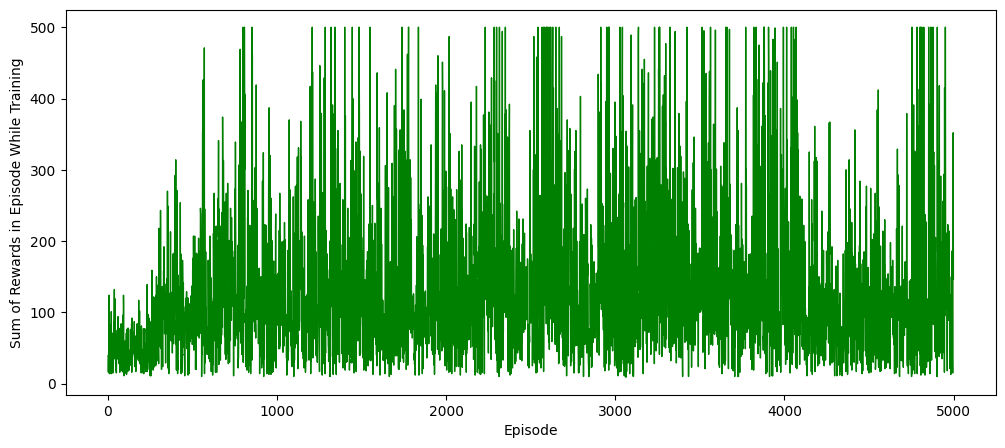

In [45]:
plt.figure(figsize=(12, 5))
plt.plot(Q.reward_sum_per_episode, color="green", linewidth=1)
plt.xlabel("Episode")
plt.ylabel("Sum of Rewards in Episode While Training")
plt.show()

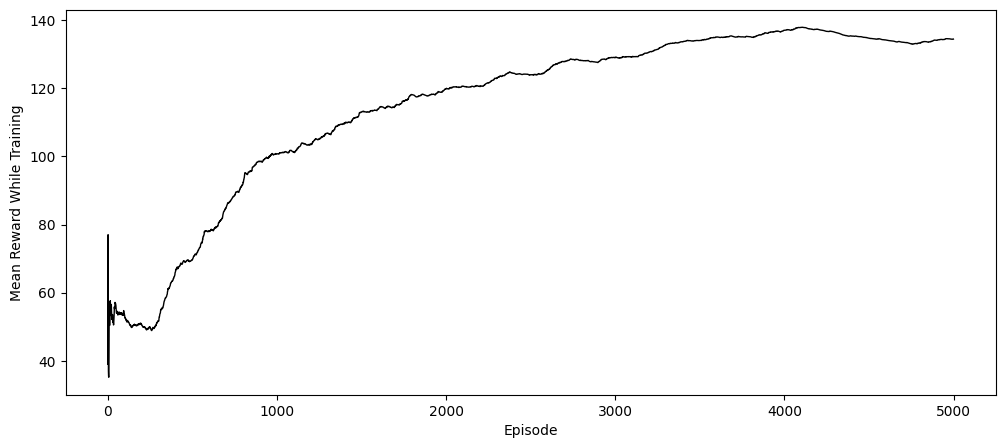

In [46]:
plt.figure(figsize=(12, 5))
plt.plot(Q.mean_reward, color="black", linewidth=1),
plt.xlabel("Episode")
plt.ylabel("Mean Reward While Training")
plt.show()

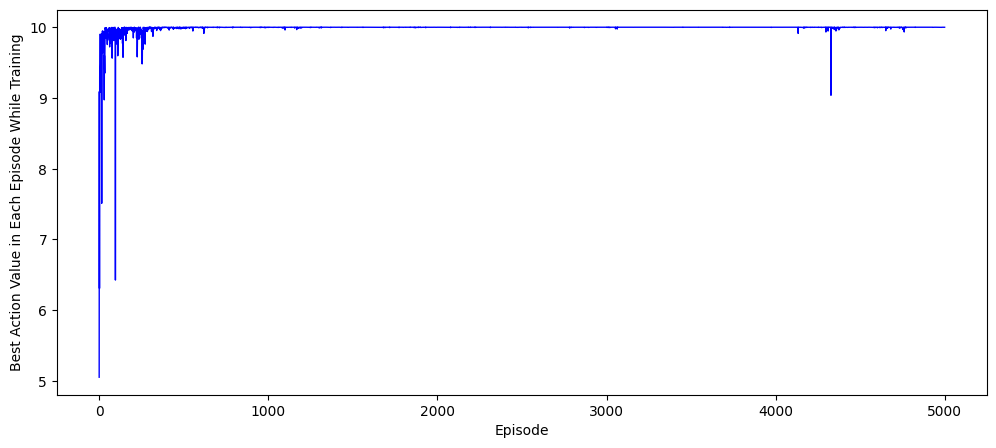

In [47]:
plt.figure(figsize=(12, 5)),
plt.plot(Q.best_action_value_per_episode, color="blue", linewidth=1)
plt.xlabel("Episode")
plt.ylabel("Best Action Value in Each Episode While Training")
plt.show()

In [48]:
print(Q.q_table)
print(np.max(Q.q_table))

[[[[[5.31999739e-01 3.99587493e-01]
    [3.26549651e-01 5.76399029e-01]
    [2.67034346e-01 1.05987399e-01]
    ...
    [9.59212629e-01 5.50442870e-01]
    [3.63966065e-01 5.08180672e-01]
    [2.56784909e-01 6.08979799e-01]]

   [[9.70020546e-01 6.44583916e-01]
    [9.90600212e-01 7.82986690e-01]
    [4.17561766e-01 9.54609956e-01]
    ...
    [1.16569555e-02 4.25720325e-01]
    [1.06314997e-01 7.29764443e-01]
    [9.42941705e-01 9.54323767e-01]]

   [[5.57594084e-01 8.18968306e-01]
    [2.76981135e-01 6.15816323e-02]
    [4.94898434e-01 2.08790609e-01]
    ...
    [6.50814660e-01 5.18188719e-01]
    [6.55433345e-01 4.39397524e-01]
    [2.93550989e-01 6.88260073e-01]]

   ...

   [[6.80760330e-01 3.50485557e-01]
    [4.00907061e-01 5.60050861e-01]
    [8.79666591e-01 3.80839592e-01]
    ...
    [1.72017135e-01 1.70034305e-01]
    [2.46463464e-02 6.81186849e-01]
    [5.61325248e-01 5.12439497e-01]]

   [[2.99724491e-01 7.97760486e-01]
    [5.59385531e-01 5.71779952e-01]
    [2.54671327e

In [52]:
mean = Q.simulate(50)

Average Reward: 172.44


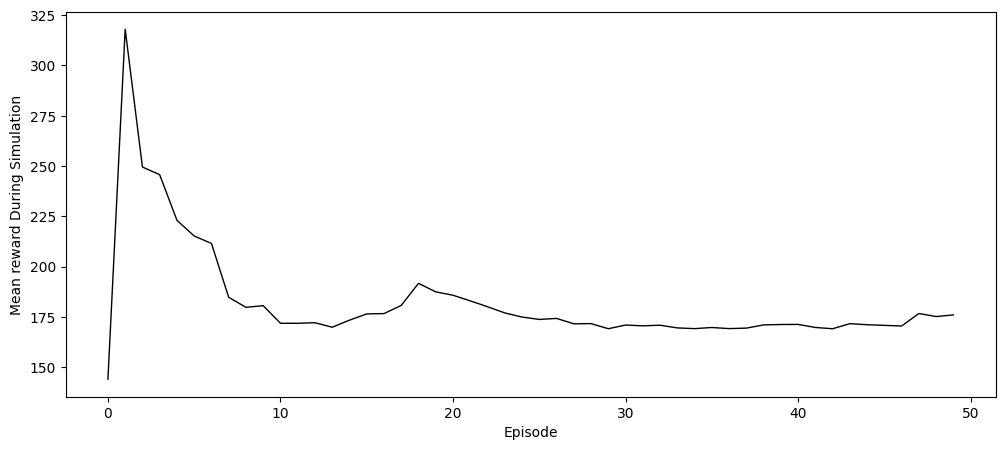

In [53]:
plt.figure(figsize=(12, 5))
plt.plot(mean, color="black", linewidth=1),
plt.xlabel("Episode")
plt.ylabel("Mean reward During Simulation")
plt.show()